In [2]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
r = requests.get('https://www.bitmex.com/api/v1/orderBook/L2?symbol=XBT&depth=25')
data = []
color=[]
for idx in r.json():
    data.append([idx["symbol"],idx["id"],idx["side"],idx["size"],idx["price"]])
    if idx["side"] == "Sell":
        color.append("blue")
    else:
        color.append("red")
df = pd.DataFrame(data, columns=["symbol","id","side","size","price"])

In [52]:
df.drop("symbol",axis=1,errors="ignore",inplace=True)
df.head()

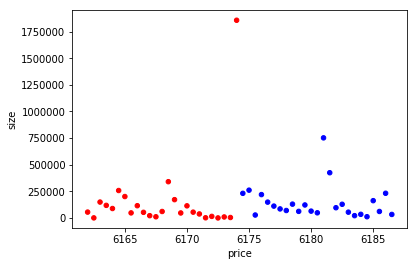

In [56]:
#sell = blue
#buy = red
df.plot.scatter(y="size",x="price",color=color)

In [8]:
import hmac
import hashlib
import base64

myid = ""
apiSecret=""
verb = "GET"
path="/api/v1/user"
expires= 1529894359
data='{"email": "curtischong5@gmail.com"}'
signature=toHex(HMAC_SHA256(apiSecret, verb + path + str(expires) + data))
dig = hmac.new(b'1234567890', msg=your_bytes_string, digestmod=hashlib.sha256).digest()
base64.b64encode(dig).decode()

r = requests.get('https://www.bitmex.com/api/v1/user?api-expires='+expires+'&api-key='+myid+'&api-signature='+signature+'&email=curtischong5@gmail.com')
#r.json()

NameError: name 'HMAC_SHA256' is not defined

In [10]:
requests.get('https://www.bitmex.com/api/v1/apikey').json()

{'error': {'message': 'Authorization Required', 'name': 'HTTPError'}}

In [2]:
import hashlib
import hmac
import json
import time
import urllib

from websocket import create_connection

###
# websocket-apikey-auth-test.py
#
# Reference Python implementation for authorizing with websocket.
# See https://www.bitmex.com/app/wsAPI for more details, including a list
# of methods.
###

# These are not real keys - replace them with your keys.
API_KEY = ""
API_SECRET = ""

# Switch these comments to use testnet instead.
BITMEX_URL = "wss://testnet.bitmex.com"
#BITMEX_URL = "wss://www.bitmex.com"

VERB = "GET"
ENDPOINT = "/realtime"


def main():
    """Authenticate with the BitMEX API & request account information."""
    test_with_message()
    test_with_querystring()


def test_with_message():
    # This is up to you, most use microtime but you may have your own scheme so long as it's increasing
    # and doesn't repeat.
    nonce = int(round(time.time() * 1000))
    # See signature generation reference at https://www.bitmex.com/app/apiKeys
    signature = bitmex_signature(API_SECRET, VERB, ENDPOINT, nonce)

    # Initial connection - BitMEX sends a welcome message.
    ws = create_connection(BITMEX_URL + ENDPOINT)
    print("Receiving Welcome Message...")
    result = ws.recv()
    print("Received '%s'" % result)

    # Send API Key with signed message.
    request = {"op": "authKey", "args": [API_KEY, nonce, signature]}
    ws.send(json.dumps(request))
    print("Sent Auth request")
    result = ws.recv()
    print("Received '%s'" % result)

    # Send a request that requires authorization.
    request = {"op": "subscribe", "args": "position"}
    ws.send(json.dumps(request))
    print("Sent subscribe")
    result = ws.recv()
    print("Received '%s'" % result)
    result = ws.recv()
    print("Received '%s'" % result)

    ws.close()


def test_with_querystring():
    # This is up to you, most use microtime but you may have your own scheme so long as it's increasing
    # and doesn't repeat.
    nonce = int(round(time.time() * 1000))
    # See signature generation reference at https://www.bitmex.com/app/apiKeys
    signature = bitmex_signature(API_SECRET, VERB, ENDPOINT, nonce)

    # Initial connection - BitMEX sends a welcome message.
    ws = create_connection(BITMEX_URL + ENDPOINT +
                           "?api-nonce=%s&api-signature=%s&api-key=%s" % (nonce, signature, API_KEY))
    print("Receiving Welcome Message...")
    result = ws.recv()
    print("Received '%s'" % result)

    # Send a request that requires authorization.
    request = {"op": "subscribe", "args": "position"}
    ws.send(json.dumps(request))
    print("Sent subscribe")
    result = ws.recv()
    print("Received '%s'" % result)
    result = ws.recv()
    print("Received '%s'" % result)

    ws.close()


# Generates an API signature.
# A signature is HMAC_SHA256(secret, verb + path + nonce + data), hex encoded.
# Verb must be uppercased, url is relative, nonce must be an increasing 64-bit integer
# and the data, if present, must be JSON without whitespace between keys.
def bitmex_signature(apiSecret, verb, url, nonce, postdict=None):
    """Given an API Secret key and data, create a BitMEX-compatible signature."""
    data = ''
    if postdict:
        # separators remove spaces from json
        # BitMEX expects signatures from JSON built without spaces
        data = json.dumps(postdict, separators=(',', ':'))
    parsedURL = urllib.parse.urlparse(url)
    path = parsedURL.path
    if parsedURL.query:
        path = path + '?' + parsedURL.query
    # print("Computing HMAC: %s" % verb + path + str(nonce) + data)
    message = (verb + path + str(nonce) + data).encode('utf-8')
    #print("Signing: %s" % str(message))

    signature = hmac.new(apiSecret.encode('utf-8'), message, digestmod=hashlib.sha256).hexdigest()
    #print("Signature: %s" % signature)
    return signature

if __name__ == "__main__":
    main()

Receiving Welcome Message...
Received '{"info":"Welcome to the BitMEX Realtime API.","version":"2018-06-21T09:46:39.000Z","timestamp":"2018-06-25T04:15:03.048Z","docs":"https://testnet.bitmex.com/app/wsAPI","limit":{"remaining":38}}'
Sent Auth request
Received '{"status":400,"error":"Missing API key.","meta":{},"request":{"op":"authKey","args":["",1529900102434,"cffee6f9a3ae2a4c9b7fd0a1a3e380e783591817f594cf0982face6dbea7a422"]}}'
Sent subscribe
Received ''


WebSocketConnectionClosedException: Connection is already closed.

In [51]:
from requests.auth import AuthBase
import time
import hashlib
import hmac
from future.builtins import bytes
from future.standard_library import hooks
with hooks():  # Python 2/3 compat
    from urllib.parse import urlparse
def generate_signature(secret, verb, url, nonce, data):
    """Generate a request signature compatible with BitMEX."""
    # Parse the url so we can remove the base and extract just the path.
    parsedURL = urlparse(url)
    path = parsedURL.path
    if parsedURL.query:
        path = path + '?' + parsedURL.query

    if isinstance(data, (bytes, bytearray)):
        data = data.decode('utf8')

    # print "Computing HMAC: %s" % verb + path + str(nonce) + data
    message = verb + path + str(nonce) + data

    signature = hmac.new(bytes(secret, 'utf8'), bytes(message, 'utf8'), digestmod=hashlib.sha256).hexdigest()
    return signature
mysignature = generate_signature("","GET","/api/v1/instrument","1516993995705",'')

In [47]:
myid=""

In [52]:
headers = {'api-key': myid,
           'api-signature': mysignature,
           'api-expires': "1516993995705"
          }
r = requests.get('https://www.bitmex.com/api/v1/instrument',headers=headers)
r.text

'{"error":{"message":"Invalid API Key.","name":"HTTPError"}}'